In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


csv_path = "/content/ai_job_market_insights.csv"
df = pd.read_csv(csv_path)
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [ ]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

In [ ]:
print(f"Datapoints: {df.shape[0]}, Features: {df.shape[1]}")
print("\n Statistics of the Data")
df.describe()

Datapoints: 500, Features: 10

 Statistics of the Data


,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


In [ ]:
df.isna().sum()

,0
Job_Title,0
Industry,0
Company_Size,0
Location,0
AI_Adoption_Level,0
Automation_Risk,0
Required_Skills,0
Salary_USD,0
Remote_Friendly,0
Job_Growth_Projection,0


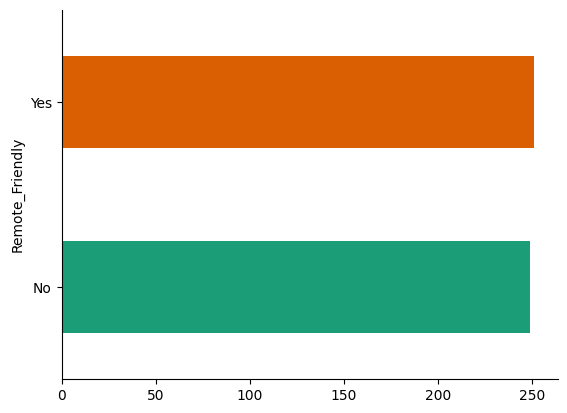

In [ ]:
df.groupby('Remote_Friendly').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

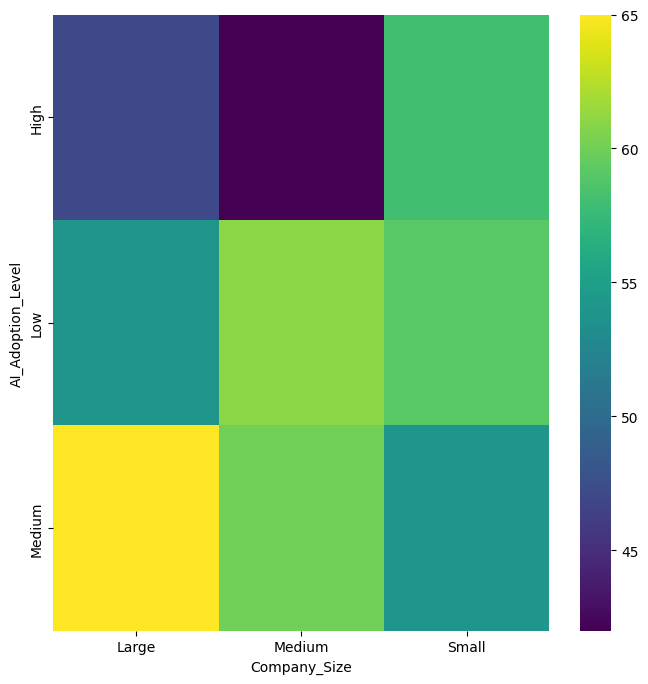

In [ ]:
# @title Company_Size vs AI_Adoption_Level

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['AI_Adoption_Level'].value_counts()
    for x_label, grp in df.groupby('Company_Size')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Company_Size')
_ = plt.ylabel('AI_Adoption_Level')

## Highest number of different Job Titles

- their description
- company features that are powered by AI

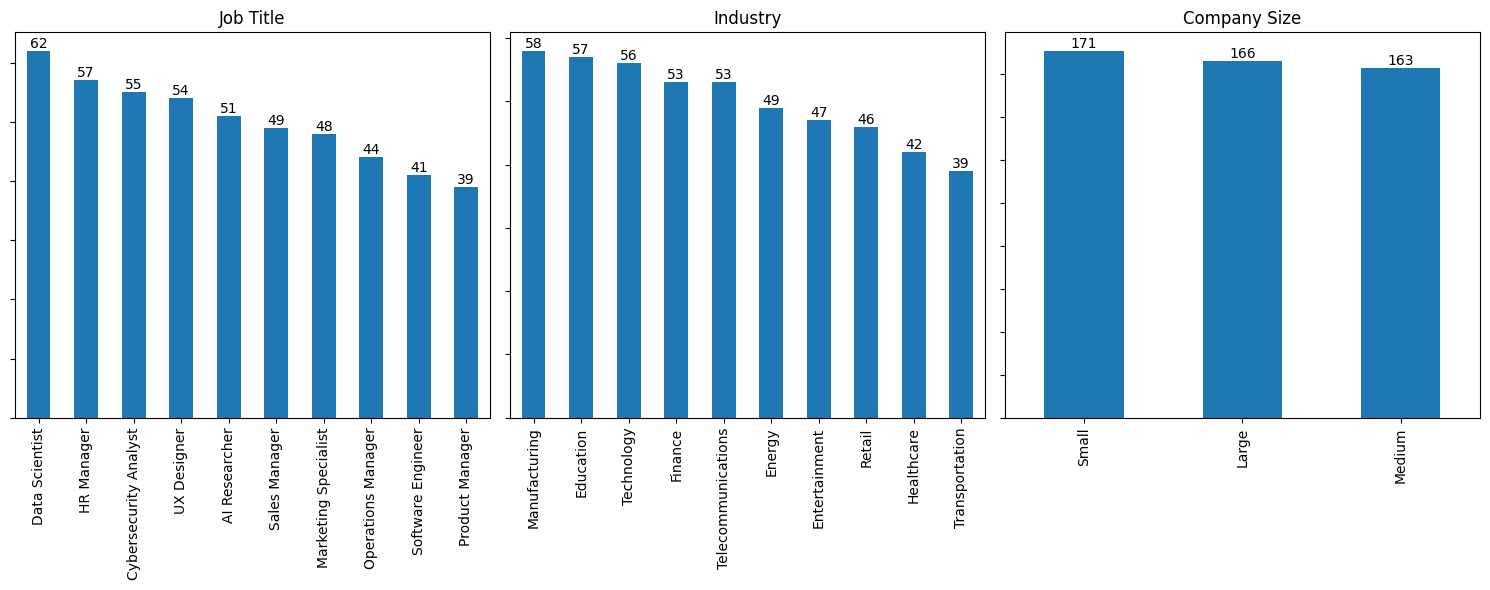

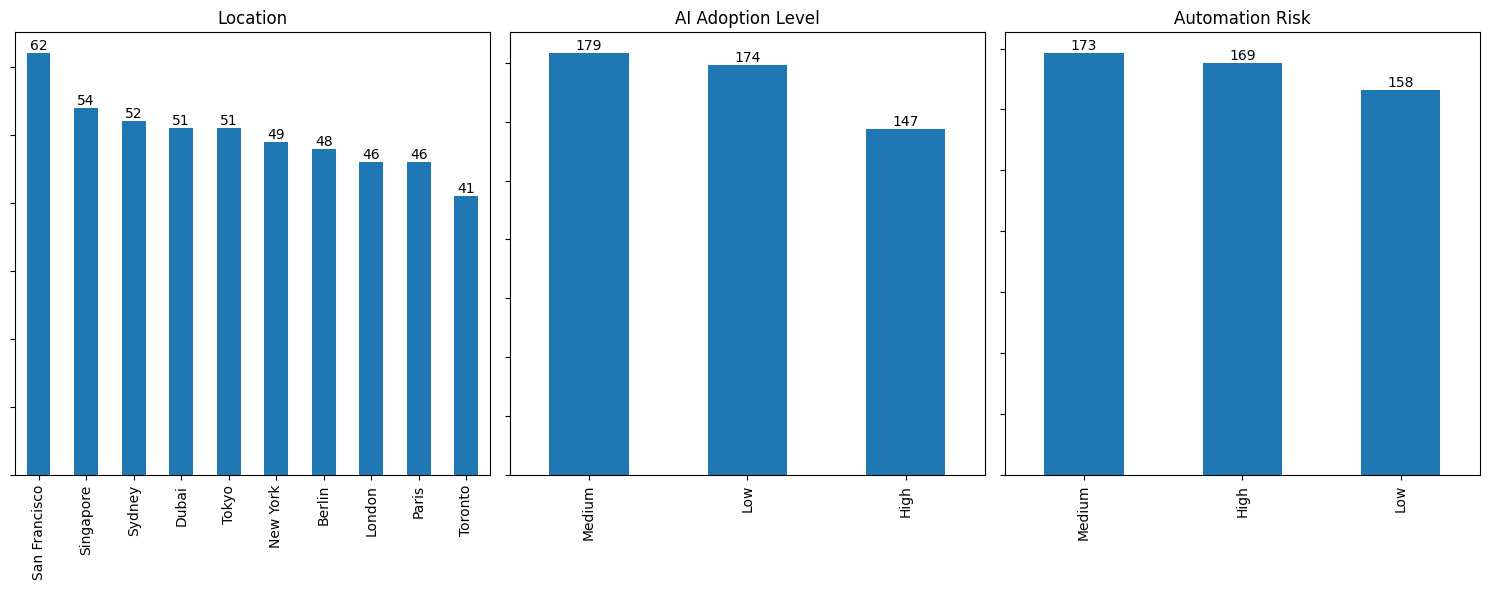

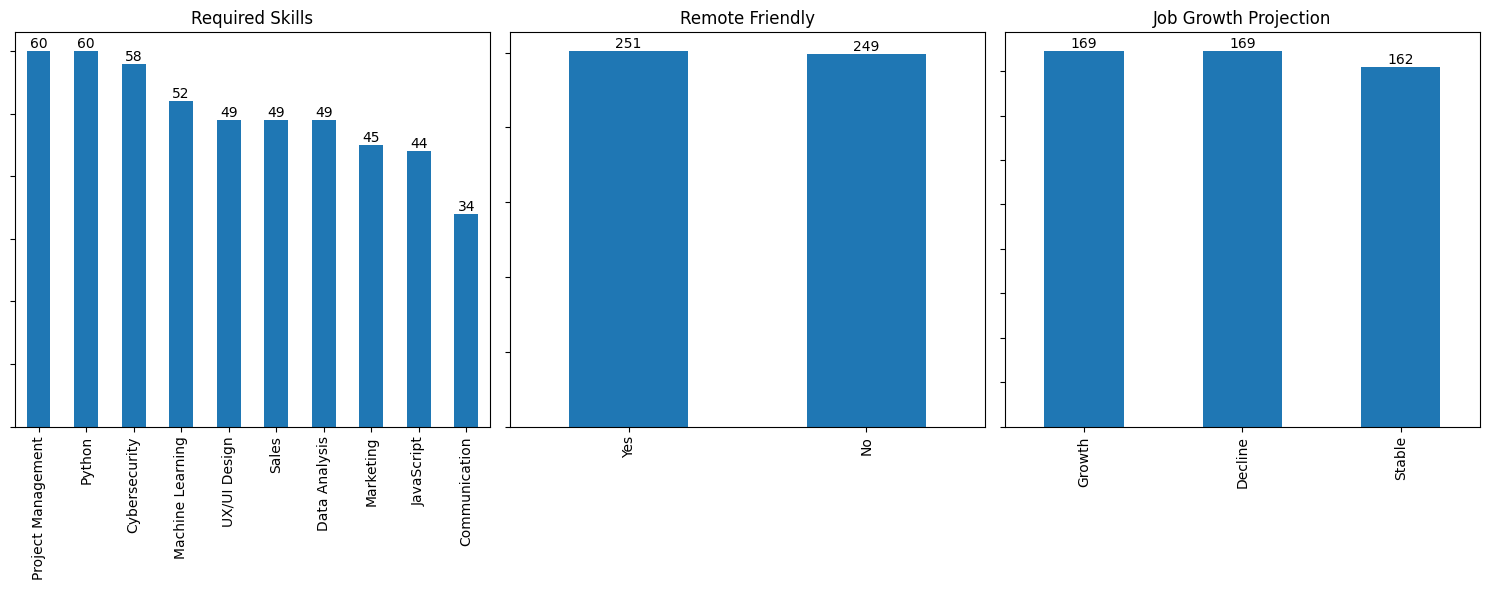

In [ ]:
salary = "Salary_USD"
cats = [i for i in df.columns if i != salary]

index = 0
for _ in range(3):
    fig, axes = plt.subplots(ncols=3, figsize=(15, 6))
    for i in range(3):
        count = df[cats[index]].value_counts()
        count.plot(kind="bar", ax=axes[i])
        for container in axes[i].containers:
            axes[i].bar_label(container)
        axes[i].set_yticklabels(())
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        axes[i].set_title(cats[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

## Salary distribution among AI powered jobs

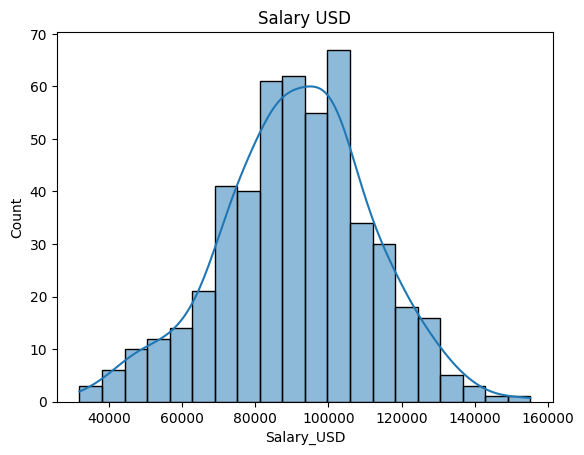

In [ ]:
fig, axes = plt.subplots()
sns.histplot(df, x=salary, kde=True, ax=axes)
axes.set_title(salary.replace('_', ' '))
plt.show()

## Average Salaries Among Different Company Types & Job Titles

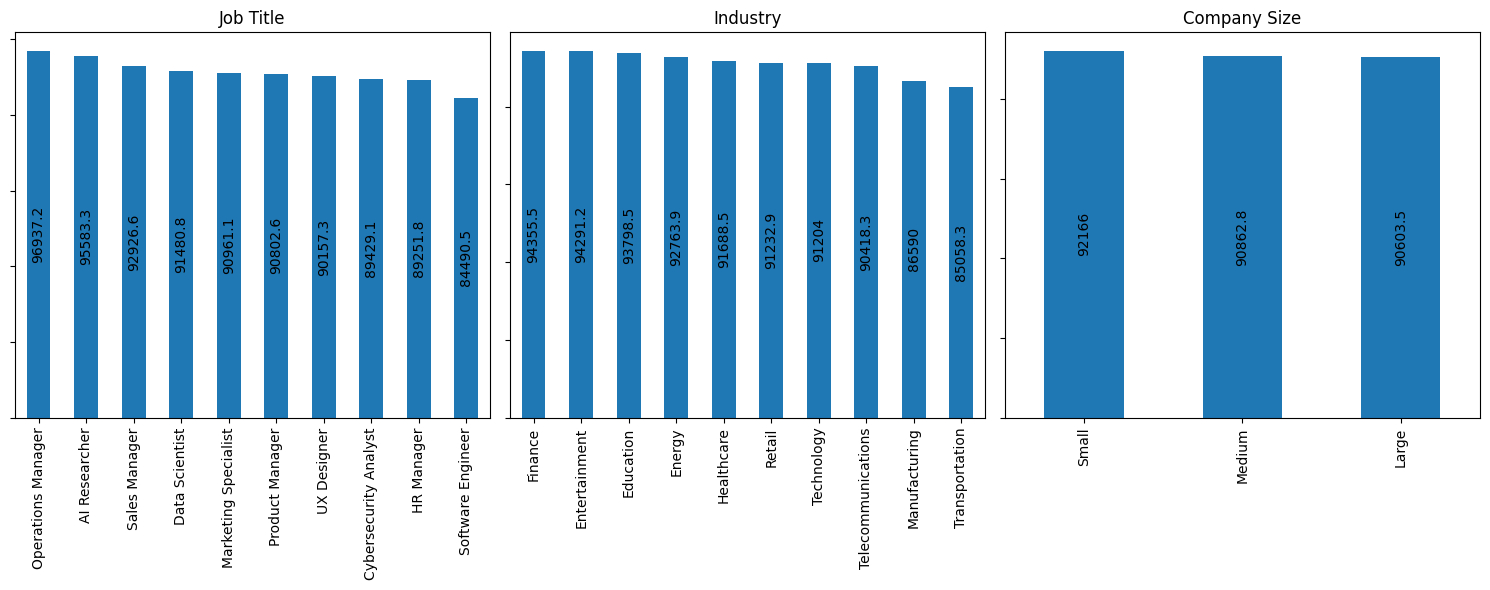

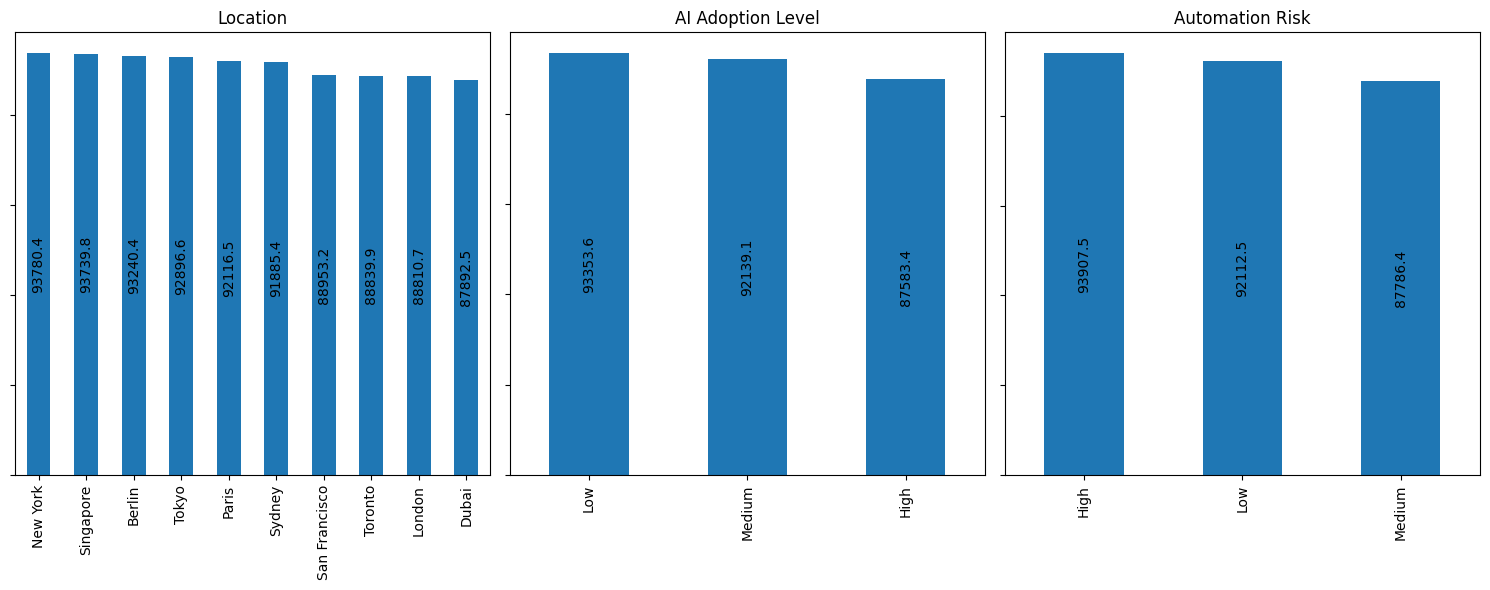

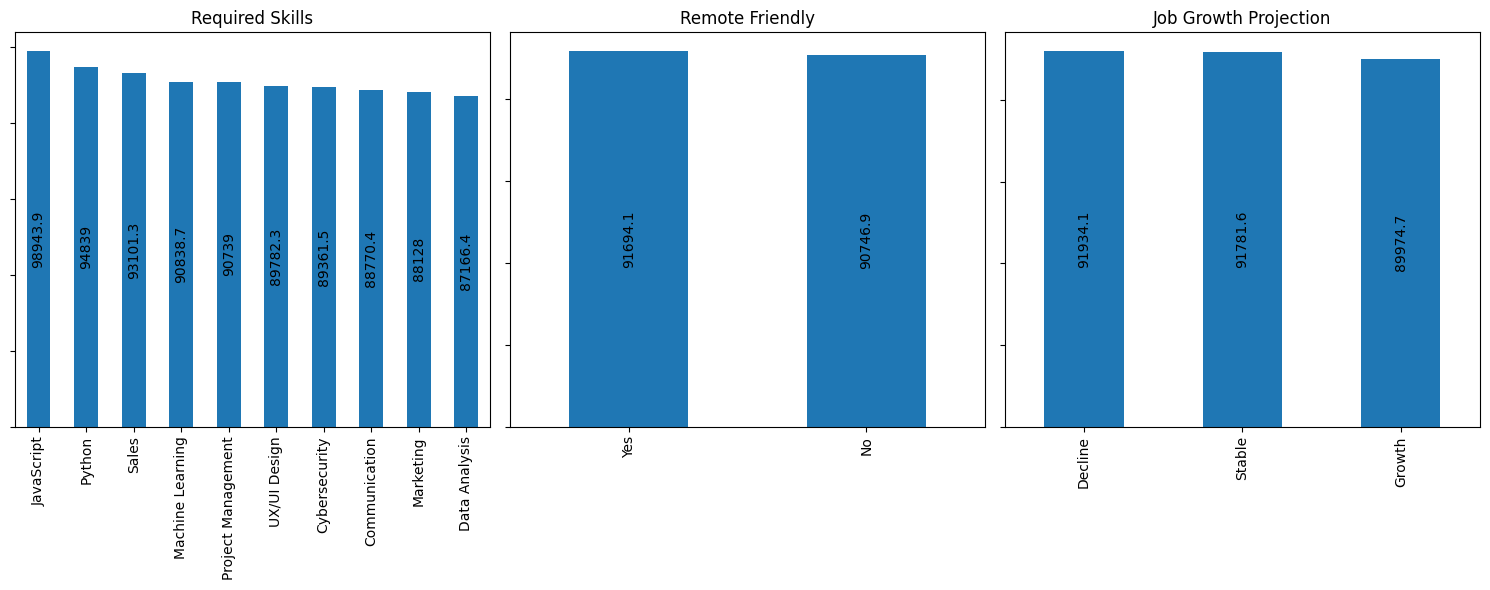

In [ ]:
index = 0
for _ in range(3):
    fig, axes = plt.subplots(ncols=3, figsize=(15, 6))
    for i in range(3):
        grouped = df.groupby(cats[index])
        mean = grouped[salary].mean()
        mean = mean.sort_values(ascending=False)
        mean.plot(kind="bar", ax=axes[i])
        for container in axes[i].containers:
            axes[i].bar_label(container, rotation=90, label_type="center")
        axes[i].set_yticklabels(())
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        axes[i].set_title(cats[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

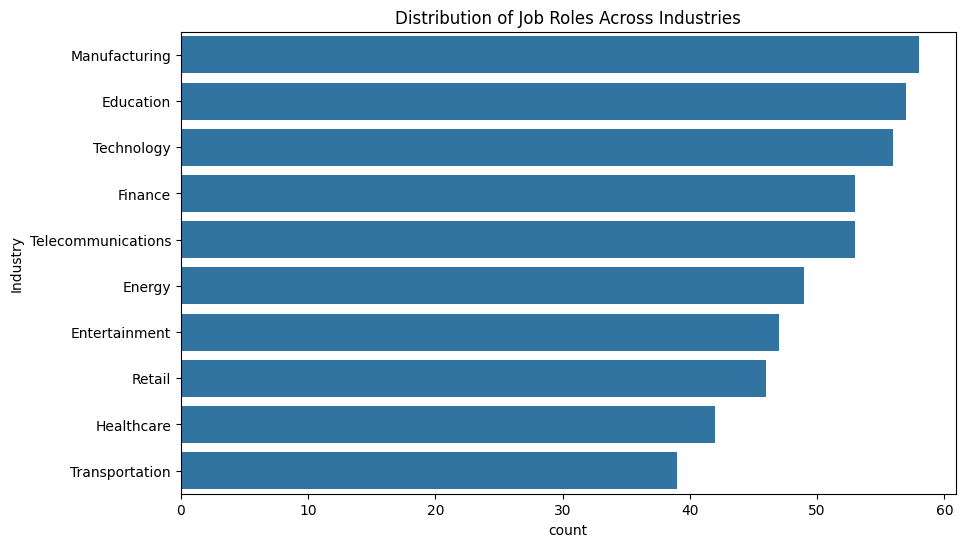

In [ ]:
# 1.2 Visualization
# Distribution of job roles across different industries
plt.figure(figsize=(10, 6))
sns.countplot(y='Industry', data=df, order=df['Industry'].value_counts().index)
plt.title('Distribution of Job Roles Across Industries')
plt.show()

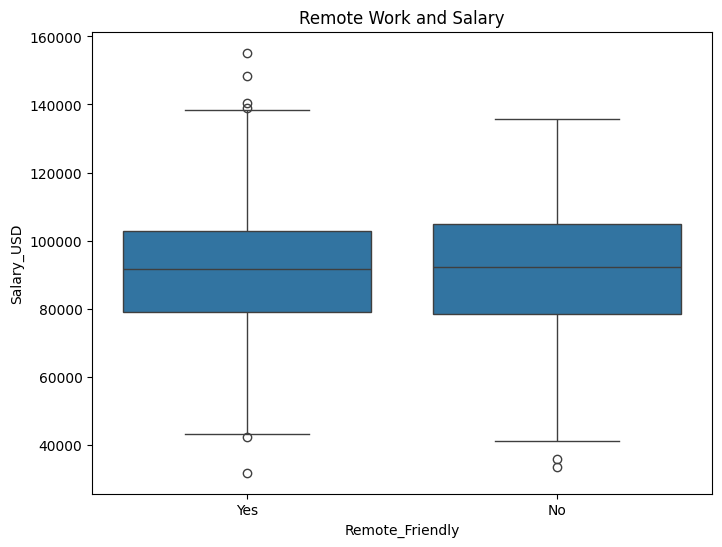

In [ ]:
# Remote Work and Salary
plt.figure(figsize=(8, 6))
sns.boxplot(x='Remote_Friendly', y='Salary_USD', data=df)
plt.title('Remote Work and Salary')
plt.show()

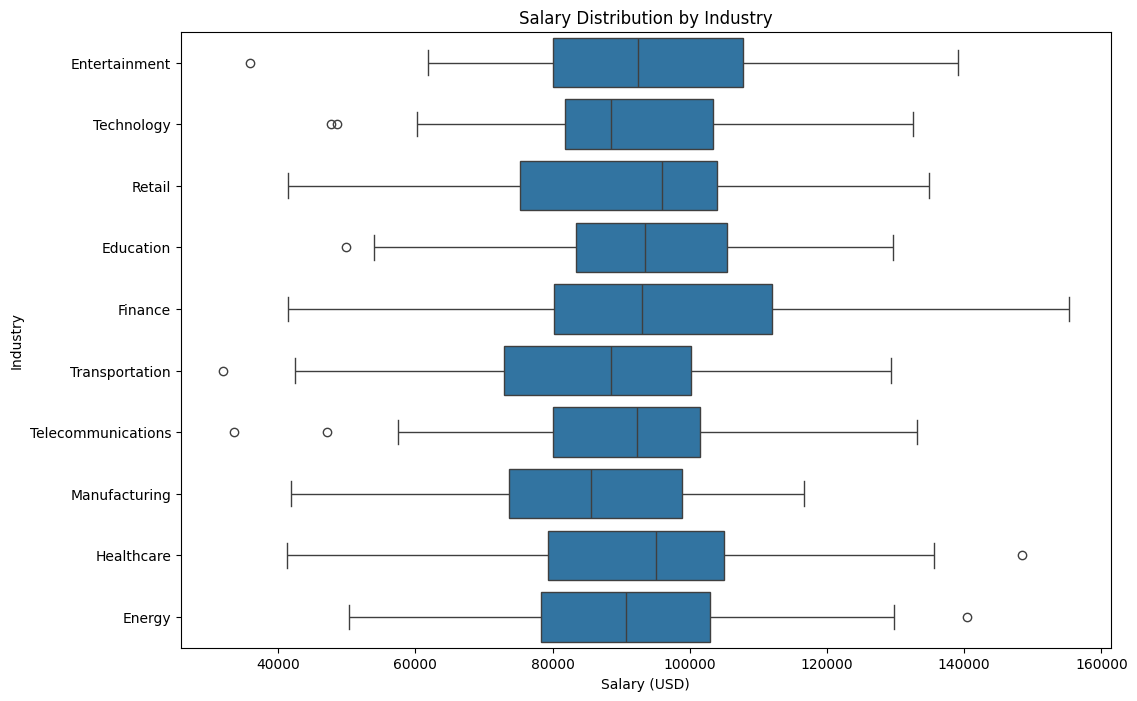

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Salary_USD', y='Industry', data=df)
plt.title('Salary Distribution by Industry')
plt.xlabel('Salary (USD)')
plt.ylabel('Industry')
plt.show()

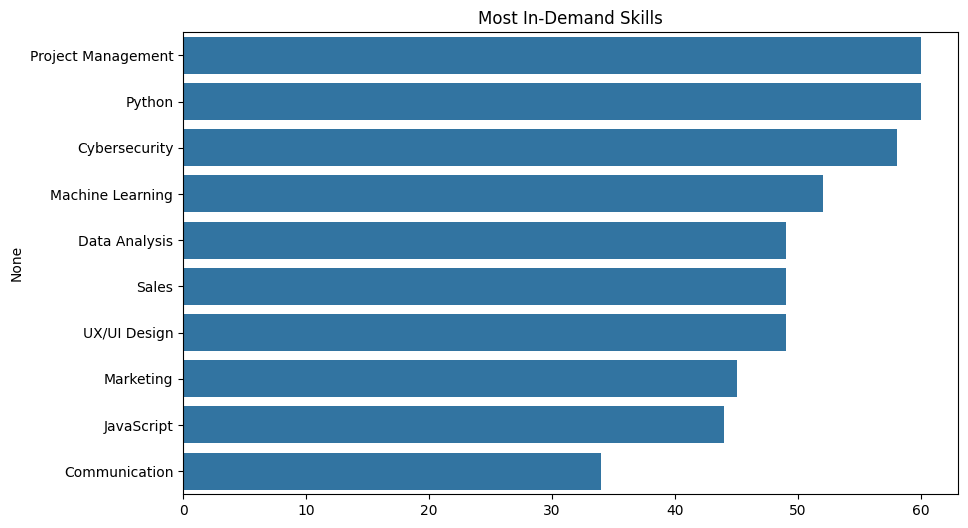

In [ ]:
# Most In-Demand Skills
skills = df['Required_Skills'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=skills.values, y=skills.index)
plt.title('Most In-Demand Skills')
plt.show()

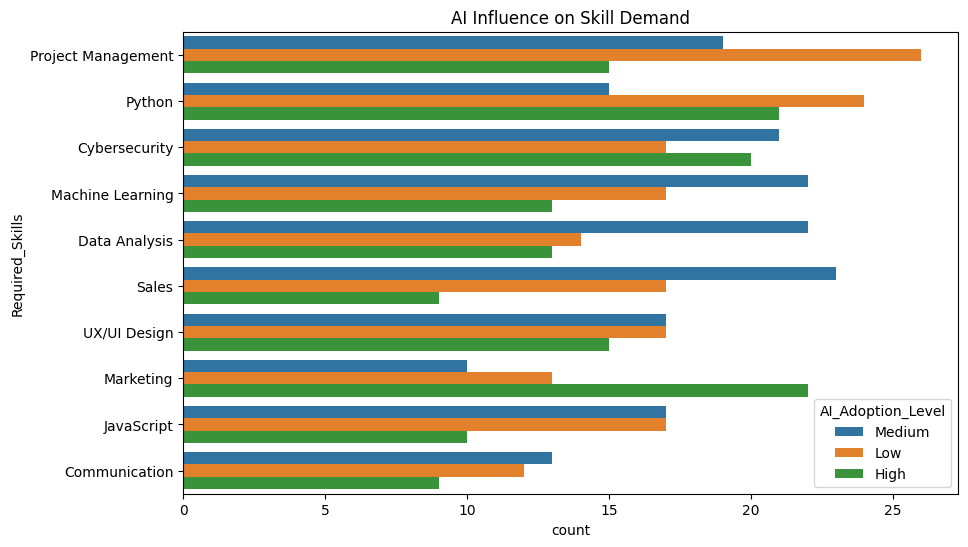

In [ ]:
# AI Influence on Skill Demand
plt.figure(figsize=(10, 6))
sns.countplot(y='Required_Skills', hue='AI_Adoption_Level', data=df, order=skills.index)
plt.title('AI Influence on Skill Demand')
plt.show()

## Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
label_encoder = LabelEncoder()

for i in cats:
    df[i] = label_encoder.fit_transform(df[i].values)

In [ ]:
x = df.drop(salary, axis=1).values
y = df[salary].values
y = y.reshape(-1, 1)

data = np.hstack((x, y))
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

x = data[:, :-1]
y = data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(400, 9) (100, 9) (400,) (100,)


In [ ]:
rfc = RandomForestRegressor()
gbc = GradientBoostingRegressor()
abc = AdaBoostRegressor()
etc = ExtraTreesRegressor()
svr = SVR()
lnr = LinearRegression()
xgb = XGBRegressor()
lgb = LGBMRegressor(verbose=-100)

models = [rfc, gbc, abc, etc, svr, lnr, xgb, lgb]
names = ["Random Forest", "Gradient Boosting", "Ada Boost", "Extra Trees",
        "Support Vector Machine", "Linear Regression", "XGBoost", "LightGBM"]

In [ ]:
def training():
    mses, r2s = [], []

    for i, j in zip(models, names):
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        mses += [mean_squared_error(pred, y_test)]
        r2s += [r2_score(pred, y_test)]

    dd = pd.DataFrame({"mse": mses, "r2": r2s}, index=names)

    fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

    index = 0

    dd = dd.sort_values("r2", ascending=False)
    dd["r2"].plot(kind="bar", ax=axes[index])
    for container in axes[index].containers:
        axes[index].bar_label(container)
    axes[index].set_yticklabels(())
    axes[index].set_xlabel("")
    axes[index].set_ylabel("")
    axes[index].set_title("R2 score")

    index += 1

    dd = dd.sort_values("mse", ascending=True)
    dd["mse"].plot(kind="bar", ax=axes[index])

    for container in axes[index].containers:
        axes[index].bar_label(container)
    axes[index].set_yticklabels(())
    axes[index].set_xlabel("")
    axes[index].set_ylabel("")
    axes[index].set_title("MSE score")

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


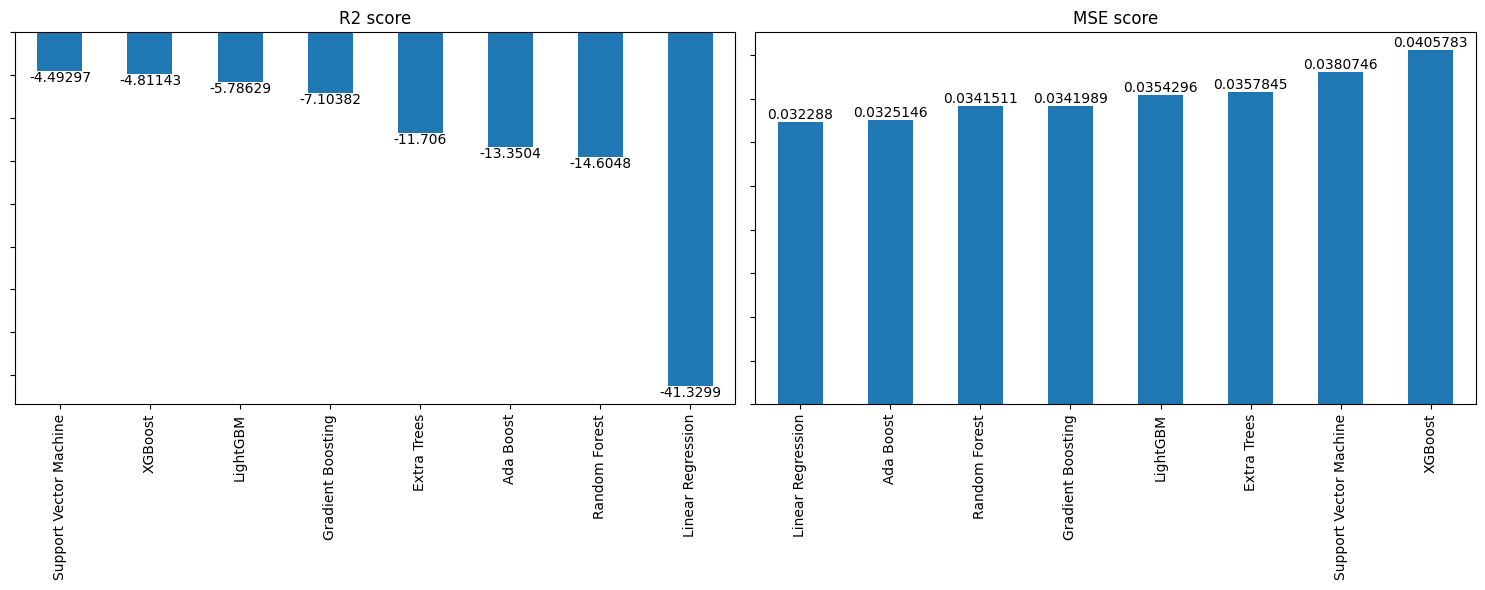

In [ ]:
training()

In [ ]:
# Automation Risk Prediction
X = pd.get_dummies(df.drop(['Automation_Risk'], axis=1), drop_first=True)
y = df['Automation_Risk']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# get accuracy
print("Automation Risk Prediction Accuracy:", accuracy_score(y_test, y_pred))
# get classification report
print("\n", classification_report(y_test, y_pred))

Automation Risk Prediction Accuracy: 0.4514285714285714

               precision    recall  f1-score   support

        High       0.38      0.44      0.41        57
         Low       0.47      0.32      0.38        59
      Medium       0.50      0.59      0.54        59

    accuracy                           0.45       175
   macro avg       0.45      0.45      0.45       175
weighted avg       0.45      0.45      0.45       175

